## Importing Required Libraries

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Importing Dataset

In [93]:
data = pd.read_csv("student_scores - student_scores.csv")

In [94]:
data.head() #First five rows and columns of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [95]:
data.shape

(25, 2)

In [96]:
data.isnull().sum() #Checking null values

Hours     0
Scores    0
dtype: int64

# Visualising Dataset

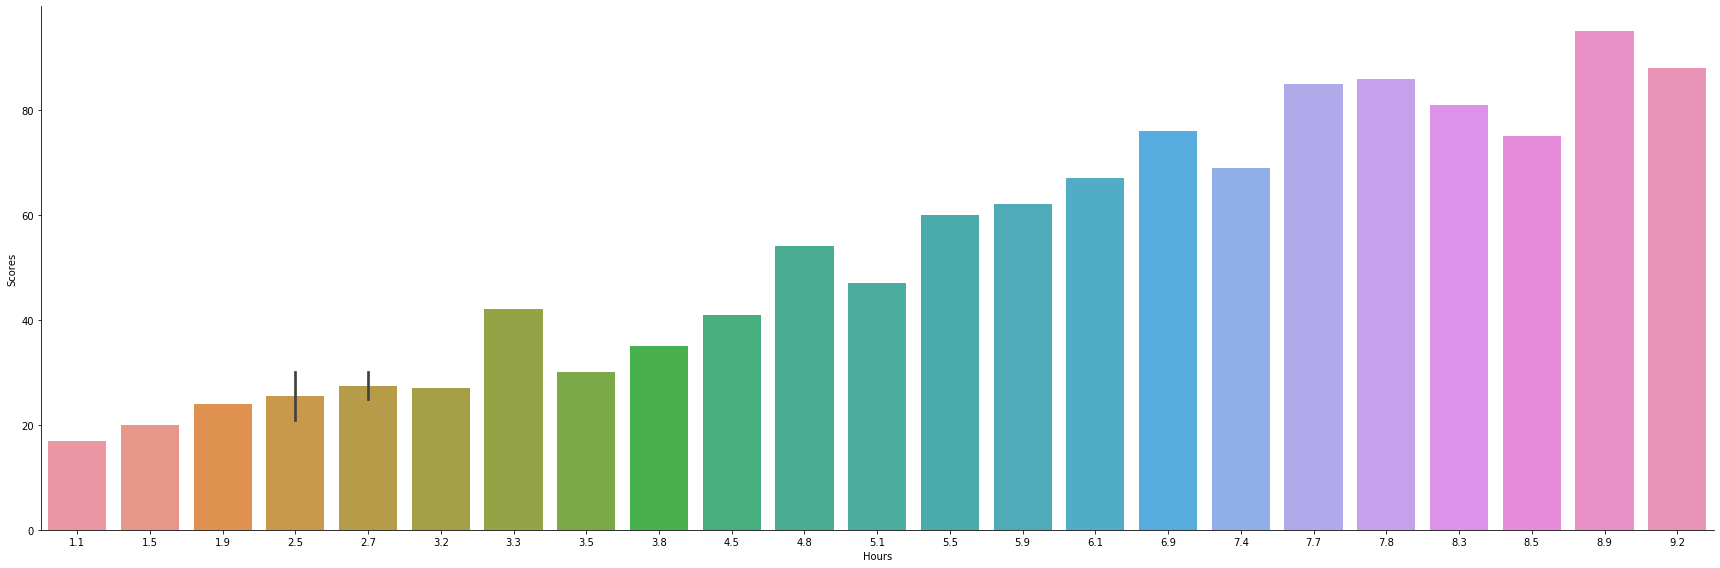

In [97]:
sns.catplot(y = "Scores", x = "Hours", data = data, kind="bar",height=8,aspect=3)
plt.show()

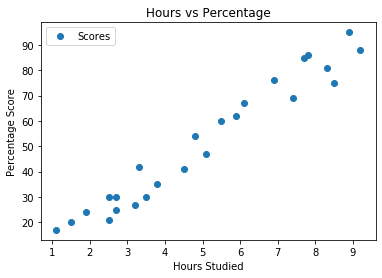

In [98]:
data.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [99]:
# Spliting independent features and dependent features

In [100]:
X= data.iloc[:,0:1].values
y = data.iloc[:,1:].values

# Splittinh training and test datset

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=0)

# Applying Random Forest Resgressor

In [103]:
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor()

In [104]:
rg.fit(x_train,y_train)

C:\Users\Akash Malik\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [105]:
rg.score(x_train,y_train)

0.9350378815188657

# Predicting values

In [107]:
y_pred=rg.predict(x_test)

## Evaluating Model

In [111]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 6.692
MSE: 63.89223
RMSE: 7.9932615370698334


In [114]:
metrics.r2_score(y_test, y_pred)

0.8918268002488794

## Testing with our own data

In [126]:
hours = [[9.25]]
pred = rg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 85.72
